<a href="https://colab.research.google.com/github/tanmay21-ai/PyCaret/blob/main/pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret
!pip install shap

     |████████████████████████████████| 320 kB 24.6 MB/s 
     |████████████████████████████████| 261 kB 45.3 MB/s 
     |████████████████████████████████| 1.7 MB 42.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 7.1 MB/s 
     |████████████████████████████████| 118 kB 65.1 MB/s 
     |████████████████████████████████| 1.3 MB 37.4 MB/s 
     |████████████████████████████████| 16.8 MB 48.2 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 2.0 MB 40.8 MB/s 
     |████████████████████████████████| 167 kB 50.2 MB/s 
     |████████████████████████████████| 6.8 MB 47.6 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 3.1 MB 58.6 MB/s 
     |████████████████████████████████| 303 kB 62.0 MB/s 
     |██████████████████

     |████████████████████████████████| 564 kB 29.7 MB/s 


In [2]:
import pycaret
from pycaret.datasets import get_data
index = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [3]:
data = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [4]:
data.shape

(1070, 19)

In [5]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [6]:
clf = setup(data,target = 'Purchase',session_id=123,log_experiment=True,experiment_name='juice1',normalize=True,feature_selection = True)

,Description,Value
0,session_id,123
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1070, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


2022/04/28 17:02:09 INFO mlflow.tracking.fluent: Experiment with name 'juice1' does not exist. Creating a new experiment.


In [7]:
training_data = get_config(variable="X_train")

In [8]:
training_data

,PctDiscCH,ListPriceDiff,WeekofPurchase,StoreID_4,PriceCH,SalePriceCH,STORE_1,SalePriceMM,PriceDiff,Store7_No,PriceMM,LoyalCH,SpecialMM_0,SpecialCH_1,STORE_3,PctDiscMM
338,-0.440067,0.958222,0.064330,0.0,-0.068865,0.309335,0.0,0.873313,0.642788,0.0,0.728044,-1.716834,1.0,0.0,0.0,-0.590308
269,-0.440067,0.958222,0.458207,0.0,-0.068865,0.309335,0.0,0.873313,0.642788,1.0,0.728044,-0.102092,1.0,0.0,0.0,-0.590308
74,-0.440067,0.770542,-1.576827,0.0,-1.756136,-0.908468,0.0,0.117757,0.569922,0.0,-0.725384,0.375354,0.0,0.0,0.0,-0.590308
327,-0.440067,-0.824738,0.786439,0.0,-0.068865,0.309335,1.0,-0.279905,-0.413767,1.0,-0.725384,-0.000752,1.0,0.0,0.0,-0.095309
662,2.874236,0.489022,0.720793,0.0,-0.068865,-2.341178,0.0,0.674482,1.808641,0.0,0.345563,-0.538793,1.0,1.0,0.0,-0.590308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,-0.440067,0.207502,-0.395194,0.0,1.221400,1.240596,0.0,1.072143,0.351324,1.0,1.110524,-0.212312,1.0,0.0,1.0,-0.590308
113,0.705931,-0.167858,-0.001316,0.0,0.228888,-0.407020,0.0,0.515417,0.679221,1.0,0.039577,0.786560,1.0,0.0,0.0,-0.590308
96,3.746126,-0.730898,1.508548,0.0,1.221400,-2.341178,0.0,0.674482,1.808641,0.0,0.345563,-0.538793,0.0,0.0,0.0,-0.590308
106,1.082721,0.113662,-0.592133,0.0,-0.068865,-0.908468,1.0,0.515417,0.934251,1.0,0.039577,0.890019,1.0,0.0,0.0,-0.590308


In [9]:
training_data.shape

(748, 16)

In [11]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [12]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8381,0.8948,0.7591,0.8100,0.7822,0.6538,0.6562,0.448
ridge,Ridge Classifier,0.8341,0.0000,0.7627,0.8006,0.7790,0.6466,0.6494,0.014
lda,Linear Discriminant Analysis,0.8341,0.8941,0.7592,0.8023,0.7784,0.6462,0.6487,0.015
gbc,Gradient Boosting Classifier,0.8222,0.8898,0.7555,0.7784,0.7653,0.6223,0.6240,0.126
ada,Ada Boost Classifier,0.8208,0.8816,0.7315,0.7896,0.7579,0.6161,0.6187,0.107
lightgbm,Light Gradient Boosting Machine,0.7955,0.8749,0.7139,0.7437,0.7279,0.5642,0.5651,0.092
rf,Random Forest Classifier,0.7927,0.8705,0.7312,0.7316,0.7292,0.5617,0.5636,0.509
svm,SVM - Linear Kernel,0.7861,0.0000,0.7036,0.7353,0.7072,0.5412,0.5517,0.015
knn,K Neighbors Classifier,0.7821,0.8424,0.6929,0.7316,0.7081,0.5349,0.5388,0.115
qda,Quadratic Discriminant Analysis,0.7821,0.8407,0.7521,0.7152,0.7239,0.5451,0.5558,0.016


In [13]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
rf = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8200,0.8794,0.7414,0.7818,0.7611,0.6168,0.6174
1,0.8200,0.9002,0.6897,0.8163,0.7477,0.6093,0.6145
2,0.8600,0.9272,0.8246,0.8103,0.8174,0.7039,0.7040
3,0.6980,0.7699,0.6491,0.5968,0.6218,0.3712,0.3721
4,0.7919,0.8552,0.7368,0.7241,0.7304,0.5611,0.5611
Mean,0.7980,0.8664,0.7283,0.7459,0.7357,0.5725,0.5738
Std,0.0545,0.0537,0.0588,0.0814,0.0640,0.1107,0.1108


In [15]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [16]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8667,0.9048,0.7931,0.8519,0.8214,0.7153,0.7164
1,0.8267,0.9067,0.8966,0.7222,0.8000,0.6502,0.6620
2,0.8533,0.9258,0.8966,0.7647,0.8254,0.7003,0.7069
3,0.8267,0.9040,0.8621,0.7353,0.7937,0.6458,0.6519
4,0.8533,0.9423,0.8621,0.7812,0.8197,0.6966,0.6990
5,0.8533,0.9269,0.9310,0.7500,0.8308,0.7040,0.7168
6,0.7467,0.7894,0.7931,0.6389,0.7077,0.4887,0.4976
7,0.7467,0.8214,0.8571,0.6154,0.7164,0.4984,0.5209
8,0.7838,0.8793,0.8214,0.6765,0.7419,0.5589,0.5667


In [17]:
tuned_rf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

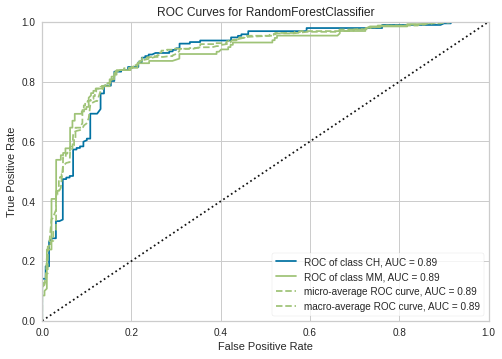

In [19]:
plot_model(tuned_rf)

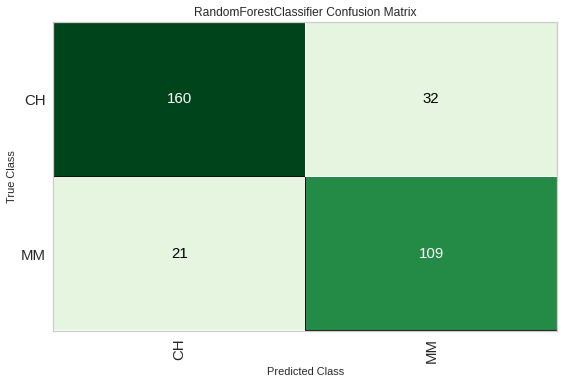

In [21]:
plot_model(tuned_rf, plot = 'confusion_matrix')

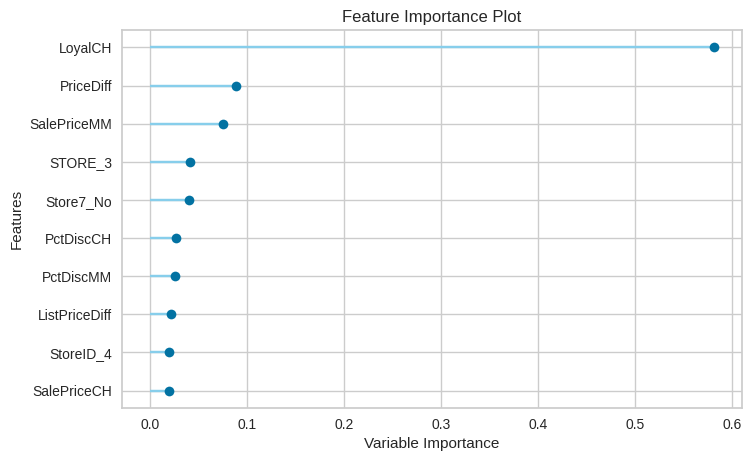

In [23]:
plot_model(tuned_rf, plot='feature')

In [24]:
#gives the most important feature

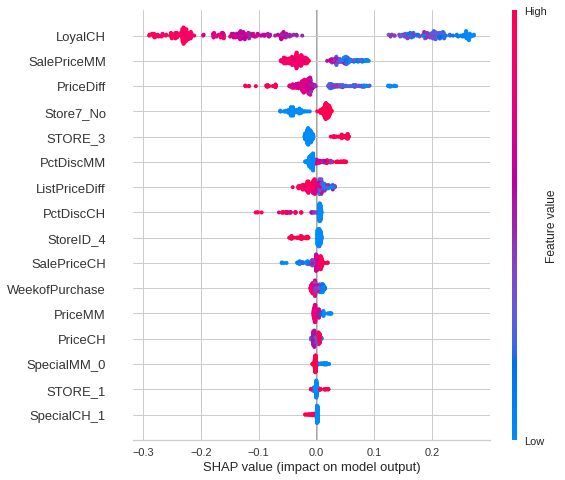

In [25]:
interpret_model(tuned_rf)

In [26]:
save_model(tuned_rf, model_name='best-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=['Id'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Purchase',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=4,
                                         max_features